## Unemployment analysis using FRED's API 

In [48]:
# Installing FRED API
#!pip install fredapi;

### Importing libraries

In [49]:
# Standard libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# FRED API
from fredapi import Fred
# Graphing style
#plt.style.use('seaborn-colorblind')
plt.style.use('fivethirtyeight')
# Show all columns in pandas
pd.set_option('max_columns', 500)
# Importing color pallete from the theme used
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
# Importing fred API key
path = 'C:\\Users\\kevmi\\OneDrive\\Documentos\\Github Proyects\\API Keys\\FRED\\fred_api_key.txt'
with open(path, 'r') as f:
    lines = f.readlines()
fred_key = lines[0]

print('Import complete')

Import complete


### 1. Creating FRED object

In [50]:
fred = Fred(api_key=fred_key)
fred

### 2. Exploring economic data available

In [51]:
series = []

Unemployment results

In [52]:
unrate_search = fred.search('Unemployment', order_by='popularity')
series.append('UNRATE')
unrate_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2022-08-14,2022-08-14,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2022-07-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2022-08-10 07:38:02-05:00,94,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2022-08-14,2022-08-14,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:02-05:00,91,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2022-08-14,2022-08-14,"All Employees, Total Nonfarm",1939-01-01,2022-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-08-05 07:45:02-05:00,82,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2022-08-14,2022-08-14,Initial Claims,1967-01-07,2022-08-06,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-08-11 07:33:01-05:00,80,An initial claim is a claim filed by an unempl...
CES0500000003,CES0500000003,2022-08-14,2022-08-14,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2022-07-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2022-08-05 07:45:02-05:00,76,The series comes from the 'Current Employment ...


Industrial Production results

In [53]:
indprod_search = fred.search('Industrial production', order_by='popularity')
series.append('INDPRO')
indprod_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
INDPRO,INDPRO,2022-08-14,2022-08-14,Industrial Production: Total Index,1919-01-01,2022-06-01,Monthly,M,Index 2017=100,Index 2017=100,Seasonally Adjusted,SA,2022-07-15 08:33:27-05:00,79,The Industrial Production Index (INDPRO) is an...
RECPROUSM156N,RECPROUSM156N,2022-08-14,2022-08-14,Smoothed U.S. Recession Probabilities,1967-06-01,2022-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-08-01 07:02:03-05:00,76,Smoothed recession probabilities for the Unite...
PCU32733273,PCU32733273,2022-08-14,2022-08-14,Producer Price Index by Industry: Cement and C...,2003-12-01,2022-07-01,Monthly,M,Index Dec 2003=100,Index Dec 2003=100,Not Seasonally Adjusted,NSA,2022-08-11 07:55:02-05:00,67,None
TCU,TCU,2022-08-14,2022-08-14,Capacity Utilization: Total Index,1967-01-01,2022-06-01,Monthly,M,Percent of Capacity,% of Capacity,Seasonally Adjusted,SA,2022-07-15 08:31:05-05:00,66,Capacity Utilization: Total Industry (TCU) is ...
OPHNFB,OPHNFB,2022-08-14,2022-08-14,Nonfarm Business Sector: Labor Productivity (O...,1947-01-01,2022-04-01,Quarterly,Q,Index 2012=100,Index 2012=100,Seasonally Adjusted,SA,2022-08-09 07:36:02-05:00,64,The Productivity and Costs release on August 7...


In [54]:
housing_search = fred.search('housing starts', order_by='popularity')
series.append('HOUST1F')
housing_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
HOUST,HOUST,2022-08-14,2022-08-14,New Privately-Owned Housing Units Started: Tot...,1959-01-01,2022-06-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-07-19 07:31:02-05:00,79,"As provided by the Census, start occurs when e..."
PERMIT,PERMIT,2022-08-14,2022-08-14,New Privately-Owned Housing Units Authorized i...,1960-01-01,2022-06-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-07-26 07:03:02-05:00,70,"Starting with the 2005-02-16 release, the seri..."
HOUST1F,HOUST1F,2022-08-14,2022-08-14,New Privately-Owned Housing Units Started: Sin...,1959-01-01,2022-06-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-07-19 07:31:13-05:00,61,None
ATNHPIUS06037A,ATNHPIUS06037A,2022-08-14,2022-08-14,All-Transactions House Price Index for Los Ang...,1975-01-01,2021-01-01,Annual,A,Index 2000=100,Index 2000=100,Not Seasonally Adjusted,NSA,2022-03-29 09:02:03-05:00,55,"As stated by the source, these annual county i..."
HOUST5F,HOUST5F,2022-08-14,2022-08-14,New Privately-Owned Housing Units Started: Uni...,1959-01-01,2022-06-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-07-19 07:31:15-05:00,45,"From January 1959 until July 1963, the 5 units..."


In [55]:
housing_search.loc['HOUST1F']['title']

'New Privately-Owned Housing Units Started: Single-Family Units'

In [56]:
retail_search = fred.search('retail sales', order_by='popularity')
series.append('RRSFS')
retail_search.head(7)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2022-08-14,2022-08-14,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2022-07-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2022-08-10 07:38:02-05:00,94,The Consumer Price Index for All Urban Consume...
TOTALSA,TOTALSA,2022-08-14,2022-08-14,Total Vehicle Sales,1976-01-01,2022-07-01,Monthly,M,Millions of Units,Mil. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-08-05 13:18:02-05:00,74,None
RSXFS,RSXFS,2022-08-14,2022-08-14,Advance Retail Sales: Retail Trade,1992-01-01,2022-06-01,Monthly,M,Millions of Dollars,Mil. of $,Seasonally Adjusted,SA,2022-07-15 07:34:01-05:00,70,E-commerce sales are included in the total mon...
RETAILIRSA,RETAILIRSA,2022-08-14,2022-08-14,Retailers: Inventories to Sales Ratio,1992-01-01,2022-05-01,"Monthly, End of Period",M,Ratio,Ratio,Seasonally Adjusted,SA,2022-07-15 09:01:01-05:00,67,The inventories to sales ratios show the relat...
ECOMPCTSA,ECOMPCTSA,2022-08-14,2022-08-14,E-Commerce Retail Sales as a Percent of Total ...,1999-10-01,2022-01-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2022-05-19 09:16:02-05:00,63,E-commerce sales are sales of goods and servic...
HTRUCKSSAAR,HTRUCKSSAAR,2022-08-14,2022-08-14,Motor Vehicle Retail Sales: Heavy Weight Trucks,1967-01-01,2022-07-01,Monthly,M,Millions of Units,Mil. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-08-05 13:18:05-05:00,62,"Heavy trucks are trucks with more than 14,000 ..."
RRSFS,RRSFS,2022-08-14,2022-08-14,Advance Real Retail and Food Services Sales,1992-01-01,2022-06-01,Monthly,M,Millions of 1982-84 CPI Adjusted Dollars,Mil. of 1982-84 CPI Adjusted $,Seasonally Adjusted,SA,2022-07-15 07:39:04-05:00,60,The data in this series are calculated using t...


In [57]:
retail_search.loc['RRSFS']['title']

'Advance Real Retail and Food Services Sales'

#### 2.1 Extracting relevant data

Function to extract dataframes

In [58]:
def get_series(series_names):
    datasets = {}
    # Generating dictionary 
    for name in series_names:
        frame = fred.get_series(series_id=name)
        datasets['df_'+str(name).lower()] = frame

        
    return datasets


Running function

In [59]:
datasets = get_series(series)
datasets.keys()

dict_keys(['df_unrate', 'df_indpro', 'df_houst1f', 'df_rrsfs'])

Creaitng dataframes

In [60]:
df_unrate = pd.DataFrame(datasets['df_unrate'], columns=['unemployment_rate'])
df_indpro = pd.DataFrame(datasets['df_indpro'], columns=['industrial_production'])
df_houst = pd.DataFrame(datasets['df_houst1f'], columns=['housing_starts'])
df_retail = pd.DataFrame(datasets['df_rrsfs'], columns=['retail_sales'])

In [61]:
df_indpro.head()

,industrial_production
1919-01-01,4.8773
1919-02-01,4.6617
1919-03-01,4.5270
1919-04-01,4.6078
1919-05-01,4.6348


#### 2.2 Extracting data by state

In [62]:
search_by_state = fred.search('unemployment by state', order_by='popularity')
search_by_state = search_by_state[(search_by_state['title'].str.contains('Unemployment Rate in')) & (search_by_state['units'] == 'Percent')
                     & (search_by_state['frequency_short'] == 'M') & (search_by_state['seasonal_adjustment_short'] == 'SA')]
# Dropping regions
search_by_state = search_by_state.drop(['CMWRUR', 'LASMT261982000000003', 'CNERUR', 'LASMT391746000000003', 'CWSTUR', 'CSOUUR', 'CNEWUR'])
search_by_state.shape

(53, 15)

In [63]:
# Extracting each dataset and joining them
all_results = []

for myid in search_by_state.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unrate_states = pd.concat(all_results, axis=1)

In [64]:
unrate_states

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,PAUR,ALUR,GAUR,MAUR,COUR,TNUR,VAUR,WIUR,WAUR,AZUR,INUR,MOUR,WVUR,OKUR,SCUR,ARUR,LAUR,IAUR,ORUR,UTUR,ILUR,MNUR,NCUR,NMUR,MSUR,NDUR,MTUR,AKUR,MDUR,NVUR,NEUR,NJUR,WYUR,CTUR,HIUR,KYUR,DCUR,IDUR,RIUR,DEUR,MEUR,KSUR,SDUR,VTUR,NHUR,PRUR,DSUR
1976-01-01,9.2,9.7,5.8,10.3,8.1,9.9,8.0,6.6,8.4,10.5,5.8,6.0,6.1,5.8,8.5,10.2,6.6,5.9,7.5,5.8,7.4,7.3,6.3,4.3,9.5,5.8,6.6,6.0,6.4,8.6,6.7,3.4,5.8,7.1,6.4,9.2,3.3,10.3,4.1,9.8,9.8,5.6,8.7,5.6,7.8,8.0,8.7,4.2,3.3,8.6,6.5,19.6,6.308
1976-02-01,9.2,9.7,5.8,10.3,8.1,9.9,8.1,6.6,8.4,10.5,5.7,6.0,6.1,5.8,8.5,10.2,6.6,5.9,7.5,5.8,7.4,7.3,6.3,4.3,9.5,5.9,6.6,6.0,6.4,8.7,6.7,3.4,5.8,7.1,6.4,9.2,3.3,10.3,4.1,9.8,9.8,5.6,8.7,5.6,7.8,8.0,8.7,4.2,3.3,8.6,6.5,19.5,6.180
1976-03-01,9.1,9.6,5.9,10.2,8.1,9.9,8.1,6.6,8.4,10.5,5.7,6.0,6.1,5.7,8.4,10.1,6.5,5.9,7.5,5.8,7.3,7.3,6.3,4.3,9.4,5.8,6.6,5.9,6.4,8.7,6.6,3.4,5.8,7.0,6.4,9.2,3.3,10.3,4.1,9.8,9.8,5.6,8.6,5.6,7.7,8.0,8.6,4.2,3.2,8.6,6.5,19.3,6.187
1976-04-01,9.1,9.5,5.9,10.2,8.0,9.8,8.1,6.5,8.3,10.3,5.6,6.0,6.0,5.6,8.5,10.0,6.3,6.0,7.5,5.8,7.2,7.2,6.4,4.2,9.2,5.8,6.6,5.8,6.3,8.6,6.4,3.5,5.8,6.9,6.4,9.0,3.2,10.3,4.0,9.6,9.7,5.6,8.5,5.6,7.7,8.1,8.6,4.2,3.1,8.6,6.5,19.0,6.129
1976-05-01,9.0,9.3,5.9,10.1,7.8,9.6,8.1,6.4,8.1,10.1,5.6,5.9,5.9,5.5,8.5,9.8,6.0,6.0,7.4,5.7,7.0,7.1,6.5,4.1,9.1,5.7,6.6,5.7,6.1,8.6,6.3,3.6,5.8,6.9,6.5,8.9,3.1,10.3,3.9,9.4,9.4,5.5,8.4,5.6,7.7,8.3,8.5,4.2,3.1,8.5,6.5,18.9,6.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,5.3,3.3,4.7,4.9,4.2,4.7,5.1,3.0,3.2,4.7,4.0,3.4,3.2,2.9,4.3,3.6,2.3,3.7,3.9,2.6,3.5,3.1,4.3,3.5,4.0,2.1,4.8,2.7,3.7,5.6,4.5,2.9,2.6,5.3,5.0,5.1,2.1,4.6,3.6,4.9,4.2,4.2,6.1,2.8,3.9,4.6,4.0,2.5,2.6,2.9,2.7,6.8,NaN
2022-03-01,4.8,3.2,4.4,4.6,4.1,4.4,4.9,2.9,3.1,4.3,3.7,3.2,3.0,2.8,4.1,3.3,2.2,3.6,3.7,2.7,3.4,3.1,4.2,3.3,3.8,2.0,4.7,2.5,3.5,5.3,4.2,2.9,2.3,4.9,4.6,5.0,2.0,4.2,3.4,4.6,4.1,4.0,6.0,2.7,3.4,4.5,3.6,2.4,2.5,2.6,2.4,6.5,NaN
2022-04-01,4.6,3.0,4.3,4.5,4.0,4.3,4.8,2.8,3.1,4.1,3.6,3.2,3.0,2.8,4.1,3.2,2.2,3.4,3.6,2.7,3.3,3.2,4.1,3.0,3.7,1.9,4.6,2.2,3.4,5.3,4.1,2.8,2.3,4.8,4.2,5.0,1.9,4.1,3.3,4.4,4.1,3.9,5.8,2.6,3.2,4.5,3.3,2.4,2.3,2.5,2.3,6.4,NaN
2022-05-01,4.3,2.9,4.2,4.4,3.9,4.3,4.6,2.7,3.0,3.9,3.5,3.3,3.0,2.9,3.9,3.2,2.2,3.1,3.5,2.8,3.3,3.2,4.0,2.7,3.5,2.0,4.6,2.0,3.4,5.1,3.9,2.6,2.4,4.6,4.0,4.9,1.9,3.9,3.2,4.2,4.1,3.8,5.7,2.5,2.9,4.5,3.2,2.3,2.3,2.3,2.1,6.2,NaN


In [66]:
# Replacing column title by name of the state
unrate_states = unrate_states.dropna()
id_to_state = search_by_state['title'].str.replace('Unemployment Rate in ','').to_dict()
unrate_states.columns = [id_to_state[c] for c in unrate_states.columns]
unrate_states = unrate_states.drop(columns='FRB-St. Louis District States (DISCONTINUED)')
unrate_states.head()

,California,Florida,Texas,New York,Ohio,Michigan,Pennsylvania,Alabama,Georgia,Massachusetts,Colorado,Tennessee,Virginia,Wisconsin,Washington,Arizona,Indiana,Missouri,West Virginia,Oklahoma,South Carolina,Arkansas,Louisiana,Iowa,Oregon,Utah,Illinois,Minnesota,North Carolina,New Mexico,Mississippi,North Dakota,Montana,Alaska,Maryland,Nevada,Nebraska,New Jersey,Wyoming,Connecticut,Hawaii,Kentucky,the District of Columbia,Idaho,Rhode Island,Delaware,Maine,Kansas,South Dakota,Vermont,New Hampshire,Puerto Rico
1976-01-01,9.2,9.7,5.8,10.3,8.1,9.9,8.0,6.6,8.4,10.5,5.8,6.0,6.1,5.8,8.5,10.2,6.6,5.9,7.5,5.8,7.4,7.3,6.3,4.3,9.5,5.8,6.6,6.0,6.4,8.6,6.7,3.4,5.8,7.1,6.4,9.2,3.3,10.3,4.1,9.8,9.8,5.6,8.7,5.6,7.8,8.0,8.7,4.2,3.3,8.6,6.5,19.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,9.9,8.1,6.6,8.4,10.5,5.7,6.0,6.1,5.8,8.5,10.2,6.6,5.9,7.5,5.8,7.4,7.3,6.3,4.3,9.5,5.9,6.6,6.0,6.4,8.7,6.7,3.4,5.8,7.1,6.4,9.2,3.3,10.3,4.1,9.8,9.8,5.6,8.7,5.6,7.8,8.0,8.7,4.2,3.3,8.6,6.5,19.5
1976-03-01,9.1,9.6,5.9,10.2,8.1,9.9,8.1,6.6,8.4,10.5,5.7,6.0,6.1,5.7,8.4,10.1,6.5,5.9,7.5,5.8,7.3,7.3,6.3,4.3,9.4,5.8,6.6,5.9,6.4,8.7,6.6,3.4,5.8,7.0,6.4,9.2,3.3,10.3,4.1,9.8,9.8,5.6,8.6,5.6,7.7,8.0,8.6,4.2,3.2,8.6,6.5,19.3
1976-04-01,9.1,9.5,5.9,10.2,8.0,9.8,8.1,6.5,8.3,10.3,5.6,6.0,6.0,5.6,8.5,10.0,6.3,6.0,7.5,5.8,7.2,7.2,6.4,4.2,9.2,5.8,6.6,5.8,6.3,8.6,6.4,3.5,5.8,6.9,6.4,9.0,3.2,10.3,4.0,9.6,9.7,5.6,8.5,5.6,7.7,8.1,8.6,4.2,3.1,8.6,6.5,19.0
1976-05-01,9.0,9.3,5.9,10.1,7.8,9.6,8.1,6.4,8.1,10.1,5.6,5.9,5.9,5.5,8.5,9.8,6.0,6.0,7.4,5.7,7.0,7.1,6.5,4.1,9.1,5.7,6.6,5.7,6.1,8.6,6.3,3.6,5.8,6.9,6.5,8.9,3.1,10.3,3.9,9.4,9.4,5.5,8.4,5.6,7.7,8.3,8.5,4.2,3.1,8.5,6.5,18.9


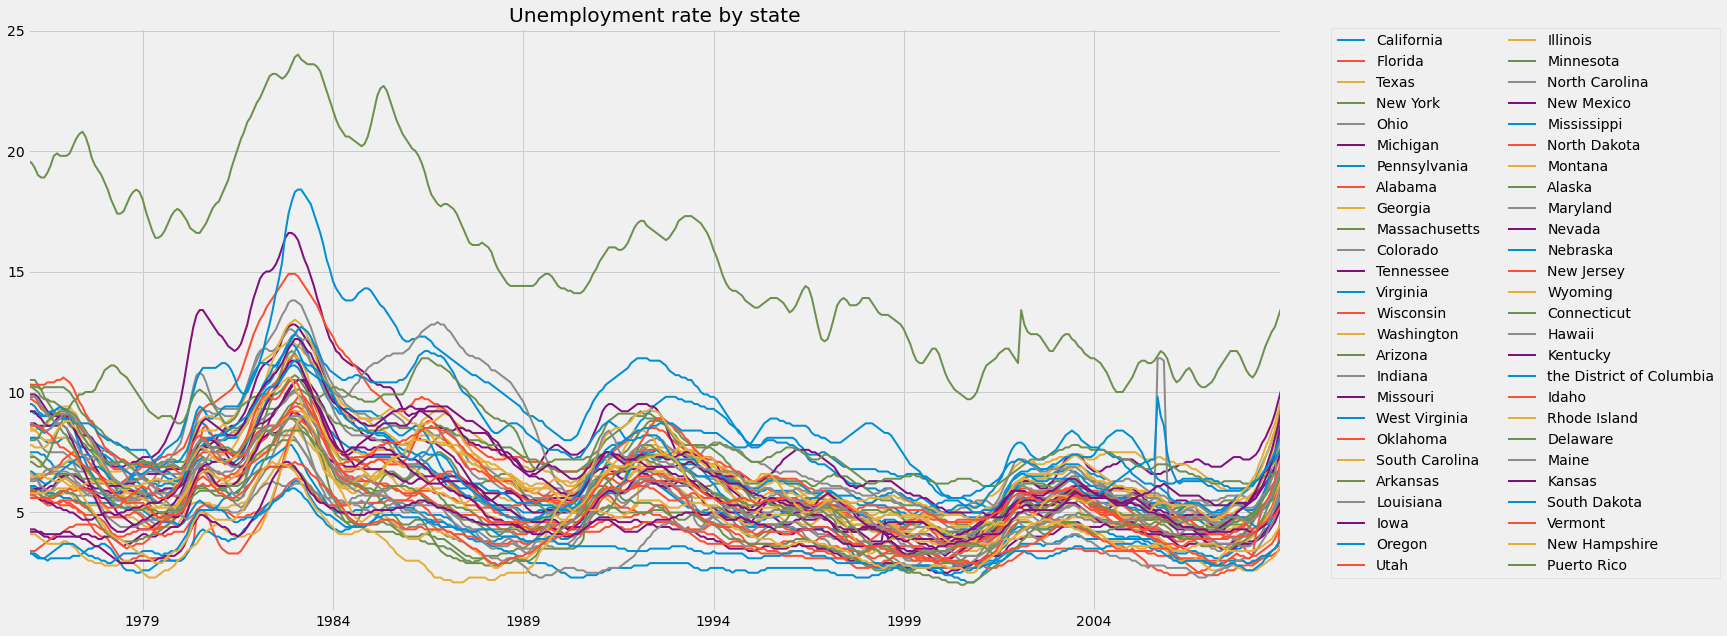

In [67]:
unrate_states.plot(figsize=(20,10), 
            title='Unemployment rate by state', lw=2)
l1 = plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0, ncol=2)

# px.line(unrate_states)